In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# EDA

<AxesSubplot:>

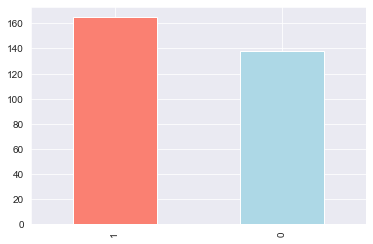

In [3]:
data['target'].value_counts().plot(kind='bar', color=['salmon', 'lightblue'])

In [4]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
cat_values = []
conti_values = []

for col in data.columns:
    if len(data[col].unique()) >= 10:
        conti_values.append(col)
    else:
        cat_values.append(col)
        
print("catageroy values: ", cat_values)
print("continous values: ", conti_values)

catageroy values:  ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
continous values:  ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


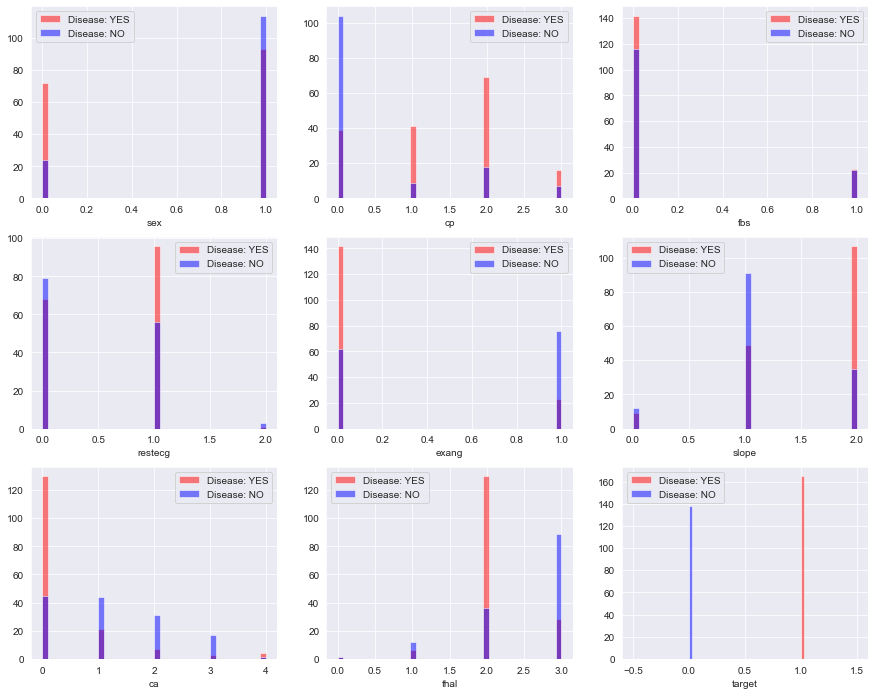

In [6]:
plt.figure(figsize=(15,12))

for i, col in enumerate(cat_values, 1):
    plt.subplot(3,3,i)
    data[data.target == 1][col].hist(bins=40, color='red', alpha=0.5, label='Disease: YES')
    data[data.target == 0][col].hist(bins=40, color='blue', alpha=0.5, label='Disease: NO')
    plt.xlabel(col)
    plt.legend()

-cp[chest pain] of any type (ie 1,2,3) are more of concern.<br>
-fbs[fasting blood sugar] with value 1 are most probably to have a heart disease.<br>
-restecg[resting EKG] with value 1(with abnormal heart hate rhyme) are more likely to have a heart disease.<br>
-exang[exercise leades to angina] value 0 are more at risk that of value 1<br>
-slope[increase in heart-rate during exercise]: value 2 are more at risk of disease that any other 2<br>
-ca[no. of major vessels stained by calcium]: value 0 are more likely to have a heart disease<br>
-thal[thalium stress result]: People with a thal value of 2 are more  likely to have a heart disease<br>

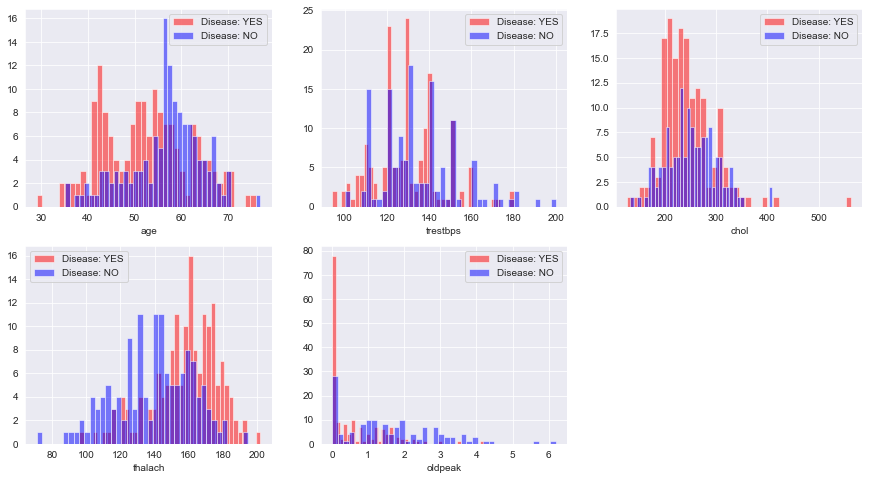

In [7]:
plt.figure(figsize=(15,8))

for i, col in enumerate(conti_values, 1):
    plt.subplot(2,3,i)
    data[data.target ==1][col].hist(bins=40, color='red', alpha=0.5,  label='Disease: YES')
    data[data.target ==0][col].hist(bins=40, color='blue', alpha=0.5,  label='Disease: NO')
    plt.xlabel(col)
    plt.legend()

trestbps[resting bp] anything above 130-140 is generally of concern<br>
chol[cholesterol] greater than 200 is of concern<br>
thalach People over 140 value are more likely to have heart disease<br>
oldpeak with value 0 are more than likely to have heart disease than any other value<br>

# Correlation matrix

<AxesSubplot:>

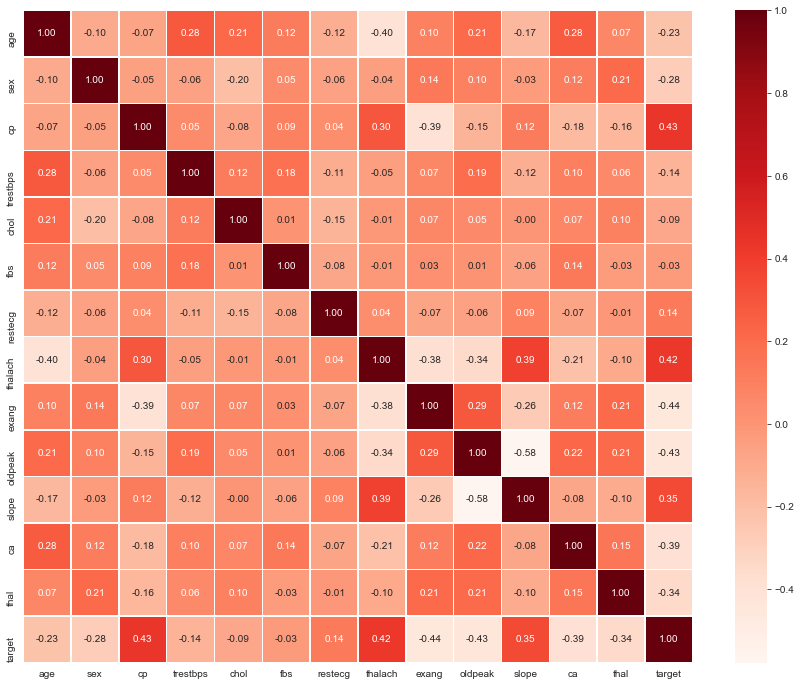

In [8]:
plt.figure(figsize=(15,12))
corr_matrix = data.corr()
sns.heatmap(corr_matrix,cmap='Reds' , annot=True, linewidths=0.5, fmt='.2f')

<AxesSubplot:title={'center':'Correlation with target'}>

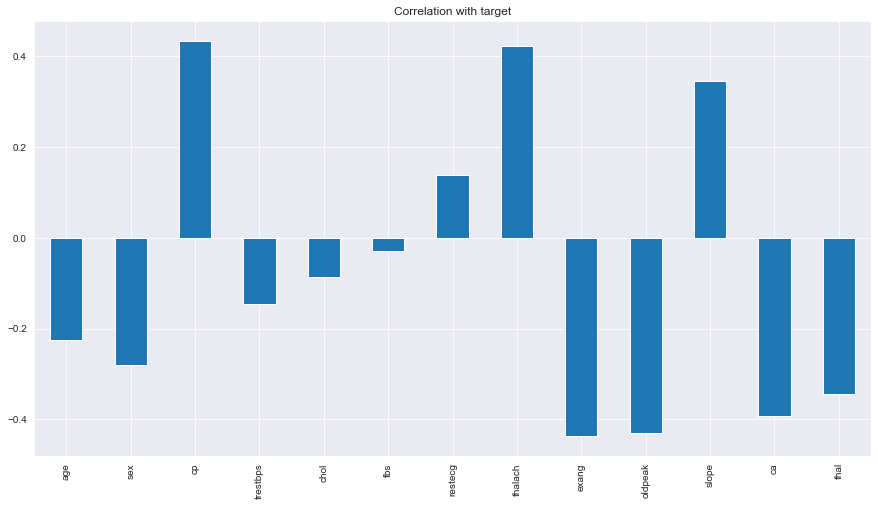

In [9]:
plt.figure(figsize=(15,8))
data.drop('target', axis=1).corrwith(data.target).plot(kind='bar', title='Correlation with target')

chol and fbs are least correating features and therefore they might be less important that other features

# Preprocessing 

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
cat_values.remove('target')
dataset = pd.get_dummies(data, columns=cat_values)

scaler = StandardScaler()
dataset[conti_values] = scaler.fit_transform(dataset[conti_values])
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


# Applying Model 

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [13]:
def print_scores(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred= clf.predict(X_train)
        clf_report = classification_report(y_train, pred)
        print("Train Report: \n=============================================")
        print(f"Accuracy: {accuracy_score(y_train, pred)*100:.2f}%")
        print("_______________________________________________")
        print(f"Classification report: \n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n{confusion_matrix(y_train, pred)}\n\n\n\n")
        
    
    elif train==False:
        pred= clf.predict(X_test)
        clf_report = classification_report(y_test, pred)
        print("Test Report: \n=============================================")
        print(f"Accuracy: {accuracy_score(y_test, pred)*100:.2f}%")
        print("_______________________________________________")
        print(f"Classification report: \n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n{confusion_matrix(y_test, pred)}\n\n\n\n")

In [14]:
from sklearn.model_selection import train_test_split

X = dataset.drop('target', axis=1)
y = dataset['target']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=70, stratify=y)

In [15]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression().fit(X_train,y_train)


print_scores(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_scores(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Report: 
Accuracy: 87.67%
_______________________________________________
Classification report: 
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       103
           1       0.88      0.90      0.89       124

    accuracy                           0.88       227
   macro avg       0.88      0.87      0.88       227
weighted avg       0.88      0.88      0.88       227

_______________________________________________
Confusion Matrix: 
[[ 87  16]
 [ 12 112]]




Test Report: 
Accuracy: 88.16%
_______________________________________________
Classification report: 
              precision    recall  f1-score   support

           0       0.93      0.80      0.86        35
           1       0.85      0.95      0.90        41

    accuracy                           0.88        76
   macro avg       0.89      0.88      0.88        76
weighted avg       0.89      0.88      0.88        76

_____________________________________________

As you can see the model performs very well of the test set as it is giving almost the same accuracy in the test set as in the training set.